In [540]:
# Import packages
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from wordcloud import WordCloud
from PIL import Image

In [541]:
# Enable display of all columns at full width
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

## Gather Data

### 1. The WeRateDogs Twitter archive

In [542]:
# Read in twitter_archive csv file using pd.read_csv
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### 2. Tweet image predictions

In [543]:
# Use Requests library to download tsv file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [544]:
# Read in image_predictions tsv file using pd.read_csv
image_predictions = pd.read_csv('image-predictions.tsv',delimiter='\t',encoding='utf-8')

### 3. Each tweet's JSON data

In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print(e)
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start) 
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
[{'code': 144, 'message': 'No status found with that ID.'}]
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Succ

Success
251: 845098359547420673
Success
252: 844979544864018432
Success
253: 844973813909606400
Success
254: 844704788403113984
Success
255: 844580511645339650
Success
256: 844223788422217728
Success
257: 843981021012017153
Success
258: 843856843873095681
Success
259: 843604394117681152
Success
260: 843235543001513987
Success
261: 842892208864923648
[{'code': 144, 'message': 'No status found with that ID.'}]
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 8399902

Success
503: 813081950185472002
Success
504: 813066809284972545
Success
505: 813051746834595840
Success
506: 812781120811126785
Success
507: 812747805718642688
Success
508: 812709060537683968
Success
509: 812503143955202048
Success
510: 812466873996607488
Success
511: 812372279581671427
Success
512: 811985624773361665
Success
513: 811744202451197953
Success
514: 811647686436880384
Success
515: 811627233043480576
Success
516: 811386762094317568
Success
517: 810984652412424192
Success
518: 810896069567610880
Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success


Success
758: 778624900596654080
Success
759: 778408200802557953
Success
760: 778396591732486144
Success
761: 778383385161035776
Success
762: 778286810187399168
Success
763: 778039087836069888
Success
764: 778027034220126208
Success
765: 777953400541634568
Success
766: 777885040357281792
Success
767: 777684233540206592
Success
768: 777641927919427584
Success
769: 777621514455814149
Success
770: 777189768882946048
Success
771: 776819012571455488
Success
772: 776813020089548800
Success
773: 776477788987613185
Success
774: 776249906839351296
Success
775: 776218204058357768
Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
[{'code': 144, 'message': 'No status found with that ID.'}]
786: 775085132600442880
Success
787: 7747578

Success
1008: 747600769478692864
Success
1009: 747594051852075008
Success
1010: 747512671126323200
Success
1011: 747461612269887489
Success
1012: 747439450712596480
Success
1013: 747242308580548608
Success
1014: 747219827526344708
Success
1015: 747204161125646336
Success
1016: 747103485104099331
Success
1017: 746906459439529985
Success
1018: 746872823977771008
Success
1019: 746818907684614144
Success
1020: 746790600704425984
Success
1021: 746757706116112384
Success
1022: 746726898085036033
Success
1023: 746542875601690625
Success
1024: 746521445350707200
Success
1025: 746507379341139972
Success
1026: 746369468511756288
Success
1027: 746131877086527488
Success
1028: 746056683365994496
Success
1029: 745789745784041472
Success
1030: 745712589599014916
Success
1031: 745433870967832576
Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
10

Success
1258: 710296729921429505
Success
1259: 710283270106132480
Success
1260: 710272297844797440
Success
1261: 710269109699739648
Success
1262: 710153181850935296
Success
1263: 710140971284037632
Success
1264: 710117014656950272
Success
1265: 709918798883774466
Success
1266: 709901256215666688
Success
1267: 709852847387627521
Success
1268: 709566166965075968
Success
1269: 709556954897764353
Success
1270: 709519240576036864
Success
1271: 709449600415961088
Success
1272: 709409458133323776
Success
1273: 709225125749587968
Success
1274: 709207347839836162
Success
1275: 709198395643068416
Success
1276: 709179584944730112
Success
1277: 709158332880297985
Success
1278: 709042156699303936
Success
1279: 708853462201716736
Success
1280: 708845821941387268
Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
12

Success
1507: 691756958957883396
Success
1508: 691675652215414786
Success
1509: 691483041324204033
Success
1510: 691459709405118465
Success
1511: 691444869282295808
Success
1512: 691416866452082688
Success
1513: 691321916024623104
Success
1514: 691096613310316544
Success
1515: 691090071332753408
Success
1516: 690989312272396288
Success
1517: 690959652130045952
Success
1518: 690938899477221376
Success
1519: 690932576555528194
Success
1520: 690735892932222976
Success
1521: 690728923253055490
Success
1522: 690690673629138944
Success
1523: 690649993829576704
Success
1524: 690607260360429569
Success
1525: 690597161306841088
Success
1526: 690400367696297985
Success
1527: 690374419777196032
Success
1528: 690360449368465409
Success
1529: 690348396616552449
Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
15

Success
1756: 678774928607469569
Success
1757: 678767140346941444
Success
1758: 678764513869611008
Success
1759: 678755239630127104
Success
1760: 678740035362037760
Success
1761: 678708137298427904
Success
1762: 678675843183484930
Success
1763: 678643457146150913
Success
1764: 678446151570427904
Success
1765: 678424312106393600
Success
1766: 678410210315247616
Success
1767: 678399652199309312
Success
1768: 678396796259975168
Success
1769: 678389028614488064
Success
1770: 678380236862578688
Success
1771: 678341075375947776
Success
1772: 678334497360859136
Success
1773: 678278586130948096
Success
1774: 678255464182861824
Success
1775: 678023323247357953
Success
1776: 678021115718029313
Success
1777: 677961670166224897
Success
1778: 677918531514703872
Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
17

Success
2006: 672272411274932228
Success
2007: 672267570918129665
Success
2008: 672264251789176834
Success
2009: 672256522047614977
Success
2010: 672254177670729728
Success
2011: 672248013293752320
Success
2012: 672245253877968896
Success
2013: 672239279297454080
Success
2014: 672231046314901505
Success
2015: 672222792075620352
Success
2016: 672205392827572224
Success
2017: 672169685991993344
Success
2018: 672160042234327040
Success
2019: 672139350159835138
Success
2020: 672125275208069120
Success
2021: 672095186491711488
Success
2022: 672082170312290304
Success
2023: 672068090318987265
Success
2024: 671896809300709376
Success
2025: 671891728106971137
Success
2026: 671882082306625538
Success
2027: 671879137494245376
Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
20

Success
2256: 667773195014021121
Success
2257: 667766675769573376
Success
2258: 667728196545200128
Success
2259: 667724302356258817
Success
2260: 667550904950915073
Success
2261: 667550882905632768
Success
2262: 667549055577362432
Success
2263: 667546741521195010
Success
2264: 667544320556335104
Success
2265: 667538891197542400
Success
2266: 667534815156183040
Success
2267: 667530908589760512
Success
2268: 667524857454854144
Success
2269: 667517642048163840
Success
2270: 667509364010450944
Success
2271: 667502640335572993
Success
2272: 667495797102141441
Success
2273: 667491009379606528
Success
2274: 667470559035432960
Success
2275: 667455448082227200
Success
2276: 667453023279554560
Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
22

In [545]:
# Read in tweet_json.txt file line by line
tweet_json = []
with open('tweet_json.txt') as f:
    for line in f:
        tweet_json.append(json.loads(line))
        
# Open tweet_json as a dataframe
favorite_retweet = pd.DataFrame(tweet_json, columns = ['id', 'favorite_count', 'retweet_count'])

## Assess Data

### Tidiness Issues

* Favorite_retweet: rename column 'id' to 'tweet_id' in order to match the other dataframes
* Combine all three dataframes
* Each dog stage has a separate column. Create a single column titled 'Dog Stage'.



### Quality Issues

* Inaccurate ratings:
    * Inaccurate denominators: 18 instances of rating denominators that aren't 10
    * Delete tweet id 8.109847e+17 that inaccurately uses 24/7 as the rating. There is no actual rating for this tweet.
    * Some rating numerators are extreme outliers
    * Some rating numerators are 0. Check to be sure these are legitimate observations.
* Dataset contains retweets
* Incorrect names
    * Non-names listed in name column:
        * Lower case names are not real names. Replace with correct names.
        * O'Malley is listed incorrectly as 'O'. Correct name.
    * Change 'None' names to NaN
* Erroneous data types (tweet_id, in_reply_to_status_id, and in_reply_to_user_id to string, timestamp to datetime, and dog stage to category)
* Incorrect dog stages:
    * Some tweets have multiple dog stages
    * Change blank dog stage to NaN values
* Source column includes URL and other characters, rendering it difficult to analyze




In [339]:
# View first 5 rows of twitter archive dataframe
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [340]:
# View last 5 rows of twitter_archive dataframe
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [9]:
# View descriptive statistics of twitter_archive dataframe
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# View info of twitter_archive dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# View all unique names in twitter_archive
# Incorrect names start with lower case letters
twitter_archive['name'].sort_values().unique()

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

In [12]:
# View first 5 rows of image_predictions dataframe
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
# View last 5 rows of image_predictions dataframe
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [14]:
# View info of image_predictions dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# View first 5 rows of favorite_retweet dataframe
favorite_retweet.head()

,id,favorite_count,retweet_count
0,892420643555336193,38461,8464
1,892177421306343426,32957,6232
2,891815181378084864,24824,4132
3,891689557279858688,41819,8592
4,891327558926688256,39990,9321


In [16]:
# View last 5 rows of favorite_retweet dataframe
favorite_retweet.tail()

,id,favorite_count,retweet_count
2337,666049248165822465,109,40
2338,666044226329800704,298,141
2339,666033412701032449,125,44
2340,666029285002620928,130,47
2341,666020888022790149,2556,511


In [17]:
# View descriptive statistics of favorite_retweet dataframe
favorite_retweet.describe()

,id,favorite_count,retweet_count
count,2.342000e+03,2342.000000,2342.000000
mean,7.422646e+17,8036.211785,2976.973527
std,6.837466e+16,12366.940684,4987.879548
min,6.660209e+17,0.000000,0.000000
25%,6.783509e+17,1391.500000,598.000000
50%,7.186224e+17,3505.500000,1391.500000
75%,7.987010e+17,9873.250000,3475.750000
max,8.924206e+17,163883.000000,84473.000000


In [18]:
# View info of favorite_retweet dataframe
favorite_retweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null int64
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


## Clean

In [546]:
# Create copies of original dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
favorite_retweet_clean = favorite_retweet.copy()

### Tidiness Issues

#### Define
Rename favorite_retweet id column to tweet_id

#### Code

In [547]:
# Rename favorite_retweet id column to tweet_id to match the other data frames
favorite_retweet_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [548]:
# Verify id column has been changed to tweet_id
list(favorite_retweet_clean)

['tweet_id', 'favorite_count', 'retweet_count']

#### Define
Combine all three dataframes into one master dataframe using merge

#### Code

In [549]:
# Merge twitter_archive, image_predictions, and favorite_retweet dataframes into one dataframe
df_final_clean = pd.merge(pd.merge(twitter_archive_clean, image_predictions_clean,on='tweet_id'),favorite_retweet_clean,on='tweet_id')

#### Test

In [550]:
# Verify that the three dataframes are merged into one
list(df_final_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count']

#### Define
'Doggo', 'Floofer', 'Pupper', and 'Puppo' are each dog stages. Instead of having their own columns, there should be a single column named 'dog stage.' Create 'dog_stage' column. Remove individual stage columns.

#### Code

In [551]:
# Delete the word 'None' from each dog stage column
df_final_clean['doggo'] = df_final_clean['doggo'].str.replace('None', '')
df_final_clean['floofer'] = df_final_clean['floofer'].str.replace('None', '')
df_final_clean['pupper'] = df_final_clean['pupper'].str.replace('None', '')
df_final_clean['puppo'] = df_final_clean['puppo'].str.replace('None', '')

In [552]:
# Create a single dog_stage column that combines all four separate dog stage columns
df_final_clean['dog_stage'] = df_final_clean['doggo'] + df_final_clean['floofer'] + df_final_clean['pupper'] + df_final_clean['puppo']

In [553]:
# Delete individual dog stage columns
df_final_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [554]:
# Confirm individual dog stage columns are dropped
list(df_final_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count',
 'dog_stage']

### Quality Issues

#### Define
Incorrect ratings: Some tweets that contain multiple #/# have the first occurrance erroneously used as the rating numerator/denominator. If denominator does not equal 10 and there are two #/#, use the second instance as the rating.


#### Code

In [555]:
# Tweets with rating denominators that do not equal 10
df_final_clean[df_final_clean.rating_denominator != 10]['text']

341     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
411     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
729     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                           
870     After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ                             
918     Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                                                
961     Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                      

In [556]:
# New dataframe of instances with two #/# patterns in text and a rating denominator that does not equal 10
df_ratings_issues = df_final_clean[df_final_clean['text'].str.contains('\d+/\d+.+\d+/\d+')]
df_ratings_issues = df_ratings_issues[df_ratings_issues.rating_denominator != 10]

In [557]:
# Replace incorrect numerator and denominator with correct rating
df_ratings_issues['rating_numerator'] = df_ratings_issues['text'].str.extract('\d+/\d+.+\s(\d+)/.+', expand=True)
df_ratings_issues['rating_denominator'] = df_ratings_issues['text'].str.extract('\d+/\d+.+\s\d+/(\d+).+', expand=True)

In [558]:
# Update df_final_clean with updated ratings and denominators from df_ratings_issues
df_final_clean.update(df_ratings_issues)

#### Test

In [559]:
# Test one of the updated tweets to ensure numerator and denominator were replaced with correct values
df_final_clean.loc[870]

tweet_id                      7.40373e+17                                                                                                                                                                                                                                                    
in_reply_to_status_id         NaN                                                                                                                                                                                                                                                            
in_reply_to_user_id           NaN                                                                                                                                                                                                                                                            
timestamp                     2016-06-08 02:41:38 +0000                                                                                       

#### Define
Delete index 411 that inaccurately uses 24/7 as the rating. There is no actual rating for this tweet.

#### Code

In [560]:
# Delete tweet without rating
df_final_clean.drop(411, inplace=True)

#### Test

In [561]:
# Verify index 411 was deleted
'411' in df_final_clean.index

False

#### Define
Inaccurate ratings: delete rating_numerator outliers

#### Code

In [562]:
# Delete observation rating_numerator of 1776
df_final_clean.query('rating_numerator == 1776')
df_final_clean.drop(796, inplace=True)

In [563]:
# Delete observation with rating_numerator of 420. It is not a picture of a dog.
df_final_clean.query('rating_numerator == 420')
df_final_clean.drop(1789, inplace=True)

#### Test

In [564]:
# Verify numerators 1776 and 420 were removed
df_final_clean['rating_numerator'].unique()

array([13, 12, 14, 5, 11, 10, 6, 15, 0, 84, 75, 27, 3, 7, 8, 9, 4, 165,
       '14', 204, '13', '11', 99, 80, 45, 60, 44, 143, 121, '10', 26, 2,
       144, 88, 1, '9'], dtype=object)

#### Define
Some tweets have a 0 numerator rating. Determine if these are legitimate observations. If not, delete.

In [565]:
df_final_clean.query('rating_numerator == "0"')
# Delete index 245- it is a copied post
df_final_clean.drop(245, inplace=True)
# Keep index 826- it is only a low rating due to visibility of the dog

#### Test

In [566]:
# Verify index 245 was deleted
'245' in df_final_clean.index

False

#### Define
Remove retweets

#### Code

In [567]:
# Keep rows where retweet_status is null
df_final_clean = df_final_clean[df_final_clean['retweeted_status_id'].isnull()]

#### Test

In [568]:
# Verify retweeted tweets were deleted
df_final_clean['retweeted_status_id'].unique()

array([ nan])

#### Define

In [569]:
# Drop retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns
df_final_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [570]:
# Verify retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns were successfully dropped
list(df_final_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count',
 'dog_stage']

#### Define
Non names listed in name column. Most non names are lower case. Create a new dataframe with lowercase names. Delete observations if they are not tweets of dogs, and replace with correct names if they are tweets of dogs.

#### Code

In [571]:
# View alphabetized unique names
df_final_clean['name'].sort_values().unique()
# At quick glance it appears the lower case names are not really names, and neither is 'None'

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Banditt', 'Banjo', 'Barclay', 'Barney',
       'Baron', 'Batdog', 'Bauer', 'Baxter', 'Bayley', 'BeBe', 'Bear',
       'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella', 'Belle',
       'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb', 'Berkeley',
       'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya', 'Biden', 'Bilbo',
       'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely', 'Blanket',
       'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu', 'Blue', 'Bluebert

In [572]:
# Create dataframe of observations with names that are lower case
df_lower_names = df_final_clean.loc[df_final_clean['name'].str.islower()]

In [573]:
# View array of lower case words in 'name' column
df_lower_names['name'].unique()

array(['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not',
       'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all',
       'infuriating', 'the', 'actually', 'by', 'officially', 'light',
       'space'], dtype=object)

In [574]:
# View 'text' column in df_lower_names
df_lower_names['text']
# Several observations have the words"is named" in the text column

21      I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba                              
50      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF       
139     We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9              
153     Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
289     Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK                                                          
434     We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/

In [575]:
# Create dataframe with lower case name & 'named' in text
df_lower_names_named = df_lower_names[df_lower_names['text'].str.contains('named')]

In [576]:
# Extract names from text
df_lower_names_named['name'] = df_lower_names_named['text'].str.extract("named\s(\w+)", expand=True).fillna('')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [577]:
# View names that were extracted from text
df_lower_names_named['name'].unique()

array(['Wylie', 'Kip', 'Jacob', 'Rufus', 'Spork', 'Cherokee', 'Hemry',
       'Alphred', 'Alfredo', 'Leroi', 'Berta', 'Chuk', 'Alfonso', 'Cheryl',
       'Jessiga', 'Klint', 'Kohl', 'Pepe', 'Octaviath', 'Johm'], dtype=object)

In [578]:
# Update df_final_clean and df_lower_names with new names
df_final_clean.update(df_lower_names_named)
df_lower_names.update(df_lower_names_named)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  raise_on_error=True)


In [579]:
# View updated 'name' column of df_lower_names
list(df_lower_names['name'])

['such',
 'a',
 'quite',
 'quite',
 'one',
 'incredibly',
 'a',
 'a',
 'very',
 'my',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'a',
 'an',
 'very',
 'a',
 'just',
 'getting',
 'very',
 'this',
 'unacceptable',
 'all',
 'a',
 'a',
 'infuriating',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'very',
 'getting',
 'just',
 'a',
 'the',
 'the',
 'actually',
 'by',
 'a',
 'officially',
 'a',
 'the',
 'the',
 'Wylie',
 'a',
 'a',
 'a',
 'a',
 'one',
 'a',
 'Kip',
 'a',
 'light',
 'just',
 'space',
 'Jacob',
 'the',
 'Rufus',
 'Spork',
 'Cherokee',
 'Hemry',
 'Alphred',
 'a',
 'Alfredo',
 'Leroi',
 'a',
 'Berta',
 'a',
 'Chuk',
 'a',
 'Alfonso',
 'Cheryl',
 'Jessiga',
 'Klint',
 'Kohl',
 'a',
 'Pepe',
 'Octaviath',
 'Johm',
 'quite',
 'a',
 'an',
 'a',
 'an',
 'the',
 'the',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a']

In [580]:
# View corrected names from 'named is' text extraction
df_final_clean['name'].sort_values().unique()

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfonso', 'Alfredo', 'Alfy',
       'Alice', 'Alphred', 'Amber', 'Ambrose', 'Amy', 'Amélie', 'Anakin',
       'Andru', 'Andy', 'Angel', 'Anna', 'Anthony', 'Antony', 'Apollo',
       'Aqua', 'Archie', 'Arlen', 'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash',
       'Asher', 'Ashleigh', 'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie',
       'Augie', 'Autumn', 'Ava', 'Axel', 'Bailey', 'Baloo', 'Banditt',
       'Banjo', 'Barclay', 'Barney', 'Baron', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Berta', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',

In [581]:
# Dataframe with lower case names that contain 'name is' in the text
df_lower_names_name_is = df_lower_names[df_lower_names['text'].str.contains('name is')]

In [582]:
# Extract correct names
df_lower_names_name_is['name'] = df_lower_names_name_is['text'].str.extract("name is\s(\w+)", expand=True).fillna('')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [583]:
# View names that were extracted
df_lower_names_name_is['name'].unique()

array(['Zoey', 'Daryl'], dtype=object)

In [584]:
# Update df_final_clean and df_lower_names with correct names
df_final_clean.update(df_lower_names_name_is)
df_lower_names.update(df_lower_names_name_is)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  raise_on_error=True)


In [585]:
# Delete rows with names that have been corrected
df_lower_names = df_lower_names.loc[df_lower_names['name'].str.islower()]

#### Test

In [586]:
# View updated names in df_final_clean
df_final_clean['name'].sort_values().unique()

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfonso', 'Alfredo', 'Alfy',
       'Alice', 'Alphred', 'Amber', 'Ambrose', 'Amy', 'Amélie', 'Anakin',
       'Andru', 'Andy', 'Angel', 'Anna', 'Anthony', 'Antony', 'Apollo',
       'Aqua', 'Archie', 'Arlen', 'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash',
       'Asher', 'Ashleigh', 'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie',
       'Augie', 'Autumn', 'Ava', 'Axel', 'Bailey', 'Baloo', 'Banditt',
       'Banjo', 'Barclay', 'Barney', 'Baron', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Berta', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',

In [587]:
# View updated names in df_lower_names
df_lower_names['name'].unique()

array(['such', 'a', 'quite', 'one', 'incredibly', 'very', 'not', 'his',
       'an', 'just', 'getting', 'this', 'unacceptable', 'all',
       'infuriating', 'the', 'actually', 'by', 'officially', 'light',
       'space'], dtype=object)

#### Define
Observations with lower case names and the strong 'only rate' in the text are not tweets of dogs. Remove these tweets.

#### Code

In [588]:
# Delete rows that have 'only rate' in the text: these are not tweets of dogs
df_lower_names = df_lower_names[~df_lower_names['text'].str.contains('only rate')]

In [589]:
# Delete rows that have 'only rate' from df_final_clean
df_final_clean = df_final_clean[~df_final_clean['text'].str.contains('only rate')]

In [590]:
# Delete row- index 1044 has an emoji between 'only' and 'rate' so it did not get deleted
df_lower_names.drop(1044, inplace=True)
df_final_clean.drop(1044, inplace=True)

In [591]:
# Index 808 has the wrong name. 'That is Quizno' is viewed in text. Replace name with 'Quizno'
df_final_clean.loc[808, 'name'] = 'Quizno'

In [592]:
# Drop index 808 from df_lower_names
df_lower_names.drop(808, inplace=True)

In [593]:
# Index 289 contains the name 'Grace'
df_final_clean.loc[289, 'name'] = 'Grace'

In [594]:
# Delete row index 289 from df_lower_names
df_lower_names.drop(289, inplace=True)

In [595]:
# Change the rest of the names in df_lower_names to 'None' 
df_lower_names.loc[ :, 'name'] = 'None'

In [596]:
# Update df_final_clean with the 'None' names
df_final_clean.update(df_lower_names)

In [597]:
# Scan observations with 'None' name to see if they actually have a name
df_final_clean.query('name == "None"')['text']

5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh   
7       When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq                       
12      Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm                                   
21      I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba                                 
23      You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV                                                     
33      Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happe

In [598]:
# Update index 229 with the name 'Boomer' as viewed in text 
df_final_clean.loc[129, 'name'] = 'Boomer'

In [599]:
# Update index 150 with the name 'Charlie' as viewed in text
df_final_clean.loc[150, 'name'] = 'Charlie'

In [600]:
# Delete more rows that aren't dogs as determined by text
df_final_clean.drop(179, inplace=True)
df_final_clean.drop(190, inplace=True)

#### Test

In [601]:
# Verify all tweets with lower case names and the words 'only rate' in the text were deleted
df_lower_names[df_lower_names['text'].str.contains('only rate')].count()

tweet_id                 0
in_reply_to_status_id    0
in_reply_to_user_id      0
timestamp                0
source                   0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                     0
jpg_url                  0
img_num                  0
p1                       0
p1_conf                  0
p1_dog                   0
p2                       0
p2_conf                  0
p2_dog                   0
p3                       0
p3_conf                  0
p3_dog                   0
favorite_count           0
retweet_count            0
dog_stage                0
dtype: int64

In [602]:
# Verify index 1044 was deleted from both dataframes
'1044' in df_lower_names.index, '1044' in df_final_clean.index

(False, False)

In [603]:
# Verify 'Quizno' is the name for index 808
df_final_clean['name'].loc[808]

'Quizno'

In [604]:
# Verify index 808 was deleted
'808' in df_final_clean.index

False

In [605]:
# Verify name in index 289, 129, and 150 were updated correctly
df_final_clean.loc[289]['name'], df_final_clean.loc[129]['name'], df_final_clean.loc[150]['name']

('Grace', 'Boomer', 'Charlie')

In [606]:
# Verify indices 179 and 190 were deleted
'179' in df_final_clean.index, '180' in df_final_clean.index

(False, False)

#### Define
Change 'None' in 'name' column to NaN

#### Code

In [607]:
# Change None to NaN
df_final_clean['name'] = df_final_clean['name'].replace('None', np.NaN)

#### Test

In [608]:
# Verify names column does not contain 'None'
df_final_clean.query('name == "None"').count()

tweet_id                 0
in_reply_to_status_id    0
in_reply_to_user_id      0
timestamp                0
source                   0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                     0
jpg_url                  0
img_num                  0
p1                       0
p1_conf                  0
p1_dog                   0
p2                       0
p2_conf                  0
p2_dog                   0
p3                       0
p3_conf                  0
p3_dog                   0
favorite_count           0
retweet_count            0
dog_stage                0
dtype: int64

#### Define
Dog name with 'O' is incorrect. It is meant to be O'Malley. Update to correct name.

#### Code

In [609]:
# View dog name with name 'O'
df_final_clean.query('name == "O"')
# Change dog name to O'Malley
df_final_clean.loc[619, 'name'] = 'O\' Malley'

#### Test

In [610]:
# Verify dog name for index 619 was changed to O'Malley
df_final_clean.loc[619]['name']

"O' Malley"

#### Define
Change erroneous data types (tweet_id, in_reply_to_status_id, and in_reply_to_user_id to string, timestamp to datetime, and dog stage to category)

#### Code

In [611]:
# Correct datatypes
df_final_clean.tweet_id = df_final_clean.tweet_id.astype('str')
df_final_clean.in_reply_to_status_id = df_final_clean.in_reply_to_status_id.astype('str')
df_final_clean.in_reply_to_user_id = df_final_clean.in_reply_to_user_id.astype('str')
df_final_clean.timestamp = pd.to_datetime(df_final_clean.timestamp)
df_final_clean.dog_stage = df_final_clean.dog_stage.astype('category')

#### Test

In [612]:
# Verify data types have been corrected
df_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1931 entries, 0 to 2066
Data columns (total 24 columns):
tweet_id                 1931 non-null object
in_reply_to_status_id    1931 non-null object
in_reply_to_user_id      1931 non-null object
timestamp                1931 non-null datetime64[ns]
source                   1931 non-null object
text                     1931 non-null object
expanded_urls            1931 non-null object
rating_numerator         1931 non-null object
rating_denominator       1931 non-null object
name                     1372 non-null object
jpg_url                  1931 non-null object
img_num                  1931 non-null float64
p1                       1931 non-null object
p1_conf                  1931 non-null float64
p1_dog                   1931 non-null object
p2                       1931 non-null object
p2_conf                  1931 non-null float64
p2_dog                   1931 non-null object
p3                       1931 non-null object
p3_conf 

#### Define
Some tweets have more than one dog stage
(doggopuppo, doggofloofer, doggopupper). Replace with correct dog stage. Delete tweets that are not dogs. Change dog stage to NaN if there is more than one type of dog. Replace blank dog stages with NaN.

#### Code

In [613]:
# View all dog stages
df_final_clean['dog_stage'].unique()

[, doggo, puppo, pupper, floofer, doggopuppo, doggofloofer, doggopupper]
Categories (8, object): [, doggo, puppo, pupper, floofer, doggopuppo, doggofloofer, doggopupper]

In [614]:
# Query tweet with 'doggopuppo' as dog stage
df_final_clean.query('dog_stage == "doggopuppo"') 
# Text indicates it is a puppo, not a doggo. Change dog_stage to puppo
df_final_clean.loc[152, 'dog_stage'] = 'puppo'

In [615]:
# Query tweet with 'doggofloofer' as dog stage
df_final_clean.query('dog_stage == "doggofloofer"')
# Text indicates it is a floofer, not a doggo. Change dog_stage to floofer
df_final_clean.loc[158, 'dog_stage'] = 'floofer'

In [616]:
# Query tweets with 'doggopupper' as dog stage
df_final_clean.query('dog_stage == "doggopupper"')
# Index 362: text indicates it is a pupper. Change dog_stage to pupper
df_final_clean.loc[362, 'dog_stage'] = 'pupper'
# Index 459: text indicates it is a pupper. Change dog_stage to pupper
df_final_clean.loc[459, 'dog_stage'] = 'pupper'
# Index 561: image indicates it is not a dog. Delete row.
df_final_clean.drop(561, inplace=True)
# Index 774: text indicates it is not a dog. Delete row
df_final_clean.drop(774, inplace=True)

In [617]:
# Doggopupper- remaining 5 entries have two dogs. Change dog stage to NaN. 
df_final_clean['dog_stage'] = df_final_clean['dog_stage'].replace('doggopupper', np.NaN)

In [618]:
# Replace blank dog stage with NaN
df_final_clean['dog_stage'] = df_final_clean['dog_stage'].replace('', np.NaN)

#### Test

In [619]:
# Verify that there are only dog stage four categories 
df_final_clean['dog_stage'].unique()

[NaN, doggo, puppo, pupper, floofer]
Categories (4, object): [doggo, puppo, pupper, floofer]

#### Define

Remove URL and other characters from 'source', leaving only the label of the source

#### Code

In [620]:
# Remove URL and other characters from each source
df_final_clean['source'] = df_final_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_final_clean['source'] = df_final_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_final_clean['source'] = df_final_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [621]:
# Verify sources were updated
df_final_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'], dtype=object)

## Store

In [622]:
# Save clean dataframe to csv
df_final_clean.to_csv('twitter_archive_master.csv', index=False)

## Analysis

In [623]:
# Read in dataframe using pd.read_csv
df = pd.read_csv('twitter_archive_master.csv')

In [624]:
# Create adjusted rating column to normalize the numerators and denominators
df['adjusted_rating'] = df['rating_numerator'] / df['rating_denominator']

In [625]:
# Create separate year and month columns with data from timestamp column
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['month'] = pd.DatetimeIndex(df['timestamp']).month

In [626]:
# Combine month and year columns
df['month_year'] = df['month'].astype(str)+'/'+df['year'].astype(str)

In [627]:
# Change datatype of month_year to datetime 
df['month_year'] = pd.to_datetime(df['month_year'])

In [628]:
# Create new dataframe with total count of tweets per month
df_my_tweet_count = df.groupby('month_year')['tweet_id'].count()

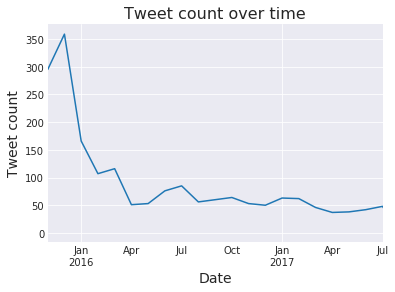

In [629]:
# Plot tweet count over time
sns.set_style('darkgrid')
df_my_tweet_count.plot(kind='line', )
plt.xlabel('Date', fontsize=14)
plt.ylabel('Tweet count', fontsize=14)
plt.title('Tweet count over time', fontsize=16)
plt.xlim([datetime.date(2015, 11, 1), datetime.date(2017, 7, 31)])
plt.savefig('tweet_count_time.png')
plt.show();

Tweet activity has decreased rapidly over time. WeRateDogs hit it's peak in popularity in December 2015 with 359 tweets before decreasing sharply and leveling out between 35-85 tweets per month during the last year that data was collected.

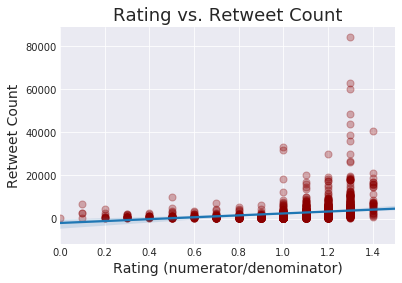

In [630]:
# Visualization of rating and retweet count
sns.set_style('darkgrid')
sns.regplot(x=df['adjusted_rating'], y=df['retweet_count'], scatter_kws={"color":"darkred","alpha":0.3,"s":50})
plt.xlabel('Rating (numerator/denominator)', fontsize=14)
plt.ylabel('Retweet Count', fontsize=14)
plt.title('Rating vs. Retweet Count', fontsize=18)
plt.xlim(0,1.5)
plt.savefig('rating_vs_retweet.png')
plt.show();

In [631]:
# Correlation coefficient of adjusted_ratinga and retweet_count
np.corrcoef(df['adjusted_rating'], df['retweet_count'])

array([[ 1.        ,  0.25060213],
       [ 0.25060213,  1.        ]])

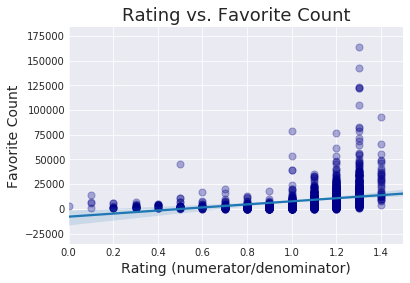

In [632]:
# Visualization of ratings and favorite counts
sns.regplot(x=df['adjusted_rating'], y=df['favorite_count'], scatter_kws={"color":"darkblue","alpha":0.3,"s":50})
plt.xlabel('Rating (numerator/denominator)', fontsize=14)
plt.ylabel('Favorite Count', fontsize=14)
plt.title('Rating vs. Favorite Count', fontsize=18)
plt.xlim(0,1.5)
plt.savefig('rating_vs_favorite.png')
plt.show();

In [633]:
# Correlation coefficient of adjusted_rating and favorite_count
np.corrcoef(df['adjusted_rating'], df['favorite_count'])

array([[ 1.        ,  0.32937188],
       [ 0.32937188,  1.        ]])

In [634]:
# Visualization of frequency of dog names

In [635]:
# Frequency of names
df['name'].value_counts()

Charlie       11
Oliver        10
Lucy          10
Cooper        10
Tucker        9 
Penny         9 
Winston       8 
Sadie         8 
Toby          7 
Daisy         7 
Lola          7 
Koda          6 
Jax           6 
Bo            6 
Stanley       6 
Bella         6 
Chester       5 
Louis         5 
Bailey        5 
Milo          5 
Scout         5 
Buddy         5 
Leo           5 
Dave          5 
Rusty         5 
Oscar         5 
Dexter        4 
Jack          4 
Boomer        4 
Gus           4 
             .. 
Rodney        1 
Edd           1 
Skittles      1 
Liam          1 
Griswold      1 
Ginger        1 
Pipsy         1 
Bobbay        1 
Howie         1 
Kaiya         1 
Roscoe        1 
Bubba         1 
Ozzie         1 
Kollin        1 
Henry         1 
Tripp         1 
Stuart        1 
Nugget        1 
Rufio         1 
Aubie         1 
Mary          1 
Jim           1 
Jacob         1 
Cedrick       1 
Pepper        1 
Bert          1 
Stark         1 
Brandonald    

In [647]:
# Frequency of names as a percent of total
df['name'].value_counts()/df['name'].count()

Charlie       0.008023
Oliver        0.007294
Lucy          0.007294
Cooper        0.007294
Tucker        0.006565
Penny         0.006565
Winston       0.005835
Sadie         0.005835
Toby          0.005106
Daisy         0.005106
Lola          0.005106
Koda          0.004376
Jax           0.004376
Bo            0.004376
Stanley       0.004376
Bella         0.004376
Chester       0.003647
Louis         0.003647
Bailey        0.003647
Milo          0.003647
Scout         0.003647
Buddy         0.003647
Leo           0.003647
Dave          0.003647
Rusty         0.003647
Oscar         0.003647
Dexter        0.002918
Jack          0.002918
Boomer        0.002918
Gus           0.002918
                ...   
Rodney        0.000729
Edd           0.000729
Skittles      0.000729
Liam          0.000729
Griswold      0.000729
Ginger        0.000729
Pipsy         0.000729
Bobbay        0.000729
Howie         0.000729
Kaiya         0.000729
Roscoe        0.000729
Bubba         0.000729
Ozzie      

In [636]:
# Create list of dog names, excluding NaNs
name_list = []

for name in df['name']:
    name_list.append(name)
    
name_list = [name for name in name_list if str(name) != 'nan']

In [637]:
# Load dog mask
dog_mask = np.array(Image.open( "dog_shape1.jpg"))

In [638]:
name_string = " ".join(map(str, name_list))

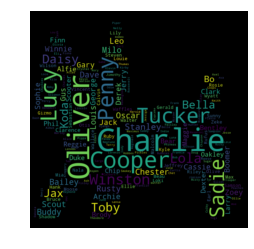

In [639]:
# Generate figure
wordcloud = WordCloud(mask=dog_mask).generate(name_string)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('name_word_cloud.png')
plt.show();

In [646]:
# Percent of tweets with names
df['name'].count()/df['tweet_id'].count()

0.71073094867807152